In [97]:
pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Tasks:
- Through EDA/statistical analysis above please come up with AT LEAST 3 insights regarding the overall data.

- In addition also come up with recommendations for your client.

### The client :Nicole Johnson 
Characteristics
 : Lively, central neighborhood, middle price range, right timing (within a year)



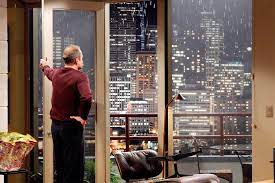

### Importing the Data & Initial Examination


In [98]:
# Importing necessary libraries
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [99]:
#Reading the dataframe
data = pd.read_csv('King_County_House_prices_dataset.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [101]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [102]:
data.shape

(21597, 21)

 Upon initial inspection, it's evident that some columns contain missing data, while others require a change in their data types, particularly the time and date columns.
### Data Cleaning


In [103]:
#Checking for Duplicates in the Data
data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [104]:
#Verifying the Data Type for the DATE Column
type(data['date'][0])

str

In [105]:
#converting the date column to time and date type
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
type(data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

We can see here that the type of the 'date' column has become datetime64[ns], allowing us to use it appropriately. Additionally, we may need to extract other columns from it, such as only the year or only the month.

Now, let's address the missing data.

In [107]:
#To determine the number of NaN values present in the dataframe:

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Let's examine the values in the three columns with missing data to understand their contents.

In [108]:
missing_lst = ['view', 'waterfront', 'yr_renovated']
for i in missing_lst:
    
    print(data[i].value_counts())
    print('===='*10)

view
0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64
waterfront
0.000    19075
1.000      146
Name: count, dtype: int64
yr_renovated
0.000       17011
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: count, Length: 70, dtype: int64



As observed, a significant portion of the values in those columns are zero. Given that these columns are not relevant to the client's requirements, filling in the missing values with zero seems appropriate for the current analysis.

In [109]:
#fill the NaN values with real values

data.fillna({'view' : 0, 'waterfront' : 0, 'yr_renovated' : 0}, inplace=True)
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


The column `sqft_basement` is currently identified as type "OBJECT," which should be converted to "float" as it pertains to the measurement of the basement. Let's identify the issue and convert it to the correct data type.

In [110]:

data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [111]:
# To know how many values in this column = ? 
(data['sqft_basement'] == "?").sum()

454

Alright, now that I've identified the issue, the plan is to convert the values equal to '?' to NaN, then fill in the missing data with zero. Since this column won't play any role based on my client's requirements.

In [112]:
# replacing the ? with NaN - and here we need to import Numpy before
data['sqft_basement'] = data['sqft_basement'].replace('?',np.NaN)

In [113]:
#to know how many NaN we have now 
data['sqft_basement'].isna().sum()

454

In [114]:
data.fillna({'sqft_basement' : 0}, inplace=True)
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

------
### EDA

We'll begin by selecting the columns that are most relevant to providing the best recommendations for my client, tailored to her requirements.
- Zipcode, latitude & longitude: Essential for locating the house and assessing its proximity to lively and central areas.
- Grade: Provides additional information about the quality and condition of the house.
- Price: Facilitates the identification of suitable houses based on the client's budget.
- Date: Aids in determining the preferable time of the year for purchasing the house.

In [115]:
mah = data[['id', 'date', 'price', 'bedrooms', 'grade', 'zipcode', 'lat', 'long']]
mah

,id,date,price,bedrooms,grade,zipcode,lat,long
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346
21593,6600060120,2015-02-23,400000.000,4,8,98146,47.511,-122.362
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069


In [116]:
mah['zipcode'].nunique()

70

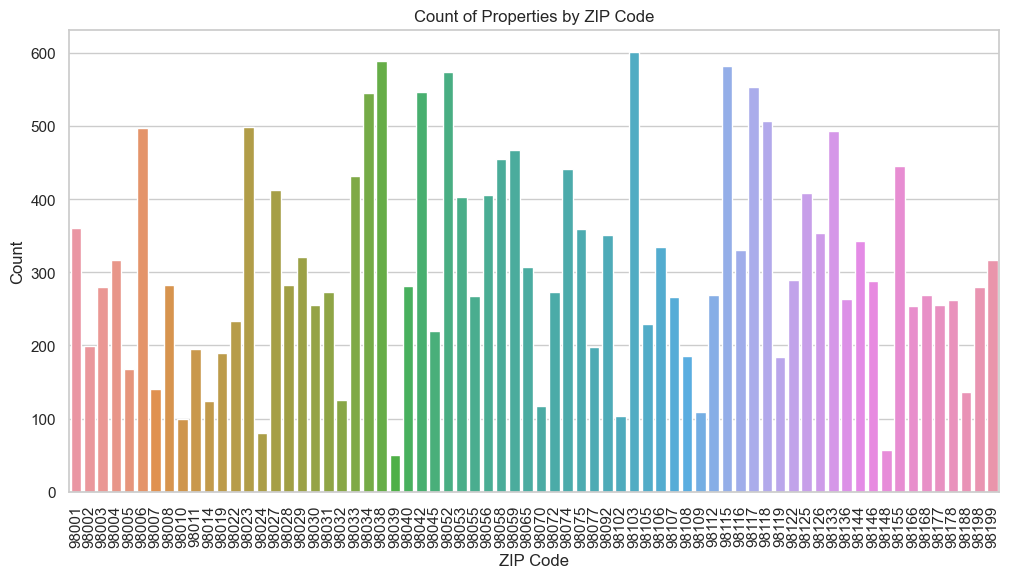

In [117]:
# Visualizing the count of Properties by ZIP Code
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=mah['zipcode'].value_counts().index, y=mah['zipcode'].value_counts())
plt.title('Count of Properties by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

Text(0.5, 1.0, 'Distripution of houses')

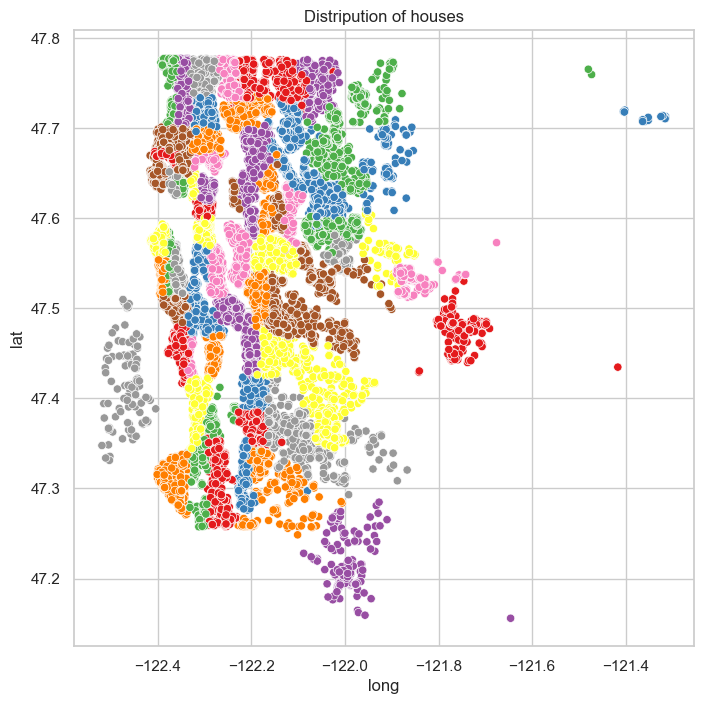

In [118]:
fig = plt.figure(figsize=(8,8))
maps_fig = sns.scatterplot(data=mah, x='long', y='lat', hue='zipcode', palette='Set1', legend=False);
plt.title('Distripution of houses')

In [119]:
import plotly.express as px

fig = px.scatter_mapbox(mah, lat='lat', lon='long', color='zipcode', zoom=10, mapbox_style="open-street-map")
fig.update_layout(title='Distribution of houses', margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


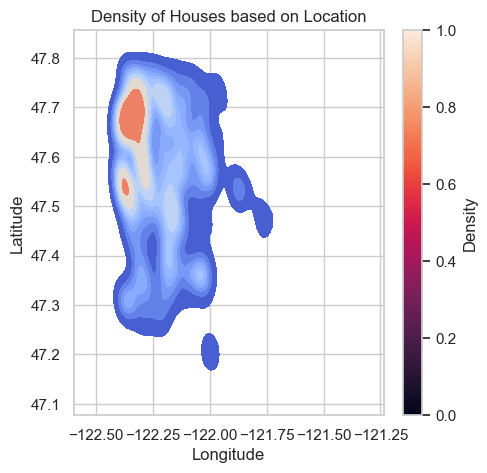

In [120]:
#plot the density population 
plt.figure(figsize=(5, 5))
kde = sns.kdeplot(x=mah['long'], y=mah['lat'], cmap='coolwarm', fill=True)

plt.title('Density of Houses based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar = plt.colorbar(kde.collections[0])
cbar.set_label('Density')

plt.show()

In this analysis, I chose to consider population density as a key factor in determining the liveliness and centrality of an area. Population density serves as a reliable indicator of a vibrant community, as areas with higher population tend to have better transportation infrastructure and access to various services, making them more lively and central. By examining the distribution of houses across different ZIP codes, I aim to identify areas with higher population density, which in turn suggests greater activity and centrality within those regions.

In [121]:
column_to_analyze = 'zipcode'  

# Calculate counts of properties for each ZIP code
zipcode_counts = mah[column_to_analyze].value_counts()

# Define bins based on counts
num_categories = 5 
lively_level = pd.qcut(zipcode_counts, q=num_categories, labels=['v.low', 'low', 'medium', 'high', 'v.high'])

# Map the lively_level categories to the original DataFrame
mah['liveliness'] = mah[column_to_analyze].map(lively_level)

# Display the resulting DataFrame with the 'lively_level' column
print(mah[['zipcode', 'liveliness']])

       zipcode liveliness
0        98178        low
1        98125       high
2        98028     medium
3        98136        low
4        98074       high
...        ...        ...
21592    98103     v.high
21593    98146     medium
21594    98144       high
21595    98027       high
21596    98144       high

[21597 rows x 2 columns]


In [141]:
mah.liveliness.value_counts()

liveliness
v.high    7359
high      5257
medium    4012
low       3288
v.low     1681
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Liveliness Levels in Housing Data')

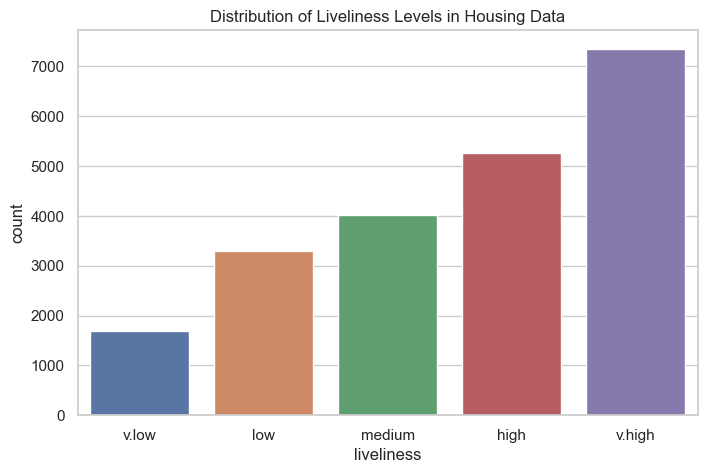

In [140]:
sns.set(style="whitegrid")
sns.countplot(data= mah, x=mah['liveliness'])
plt.title('Distribution of Liveliness Levels in Housing Data')


After calculating a new column representing liveliness based on population density, it's crucial to further explore other columns in the new dataset to gain deeper insights.

In [122]:
# how many grades do we have ? 
mah['grade'].nunique()

11

Let's enhance our analysis by extracting additional columns from the date column. This step will provide us with more detailed insights into the temporal aspects of housing trends. By extracting features such as year, month, and possibly season from the date column, we can better understand the patterns and dynamics of the housing market over time. 

In [123]:
mah['year'] = mah.date.dt.year
mah['month'] = mah.date.dt.month
mah

,id,date,price,bedrooms,grade,zipcode,lat,long,liveliness,year,month
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,low,2014,10
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,high,2014,12
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,medium,2015,2
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,low,2014,12
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,high,2015,2
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346,v.high,2014,5
21593,6600060120,2015-02-23,400000.000,4,8,98146,47.511,-122.362,medium,2015,2
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299,high,2014,6
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069,high,2015,1


In [124]:
mah.year.value_counts()

year
2014    14622
2015     6975
Name: count, dtype: int64

Similar to the approach taken with the liveliness column, we can enhance our analysis by clustering the prices into bins. This process allows us to group houses based on their price ranges, making it easier to categorize and identify suitable options for the client. 

But before that, let's quickly examine the price column and the distribution of prices across ZIP code areas for reference. This will give us a better understanding of the data before we dive into our analysis.

In [143]:
mah.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [144]:
mah.price.value_counts()

price
450000.000    172
350000.000    172
550000.000    159
500000.000    152
425000.000    150
             ... 
278800.000      1
439888.000      1
354901.000      1
942000.000      1
402101.000      1
Name: count, Length: 3622, dtype: int64

Text(0.5, 1.0, 'Price Histogram')

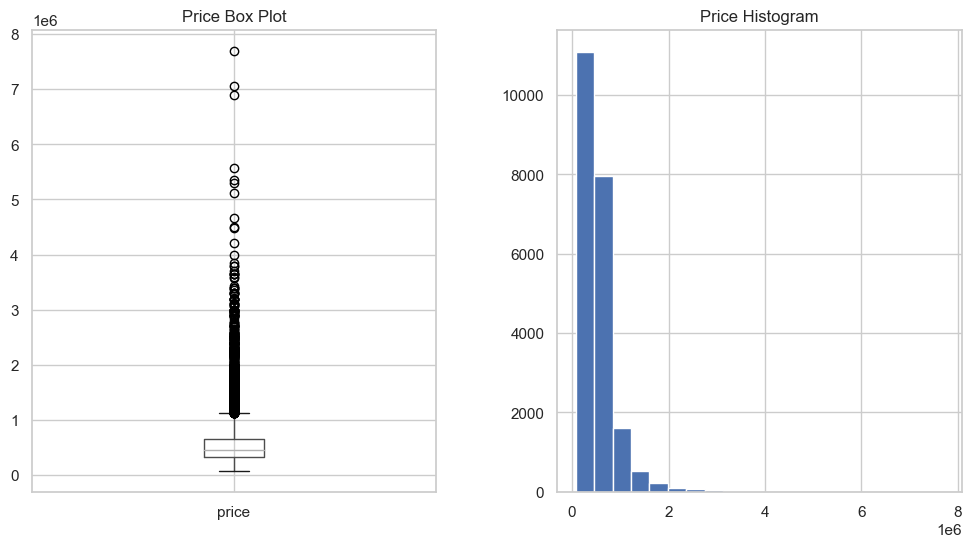

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot
mah.boxplot(column="price", ax=axes[0])
axes[0].set_title('Price Box Plot')

# Histogram
mah.hist(column="price", bins=20, ax=axes[1])
axes[1].set_title('Price Histogram')

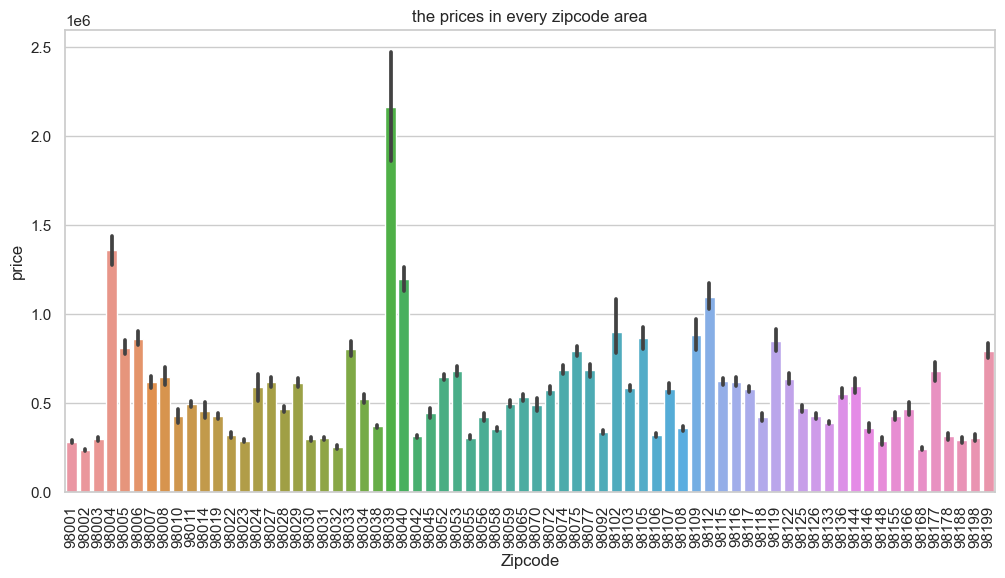

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=mah['zipcode'], y=mah['price'], data=mah)
plt.title('the prices in every zipcode area')
plt.xlabel('Zipcode')
plt.ylabel('price')
plt.xticks(rotation=90) 
plt.show()

In [125]:
column_to_analyze_price = 'price'

# Calculate quantiles for the 'price' column
price_quantiles = pd.qcut(mah[column_to_analyze_price], q=5, labels=['v.low', 'low', 'average', 'expensive', 'v.expensive'])

# Map the quantiles categories to the original DataFrame
mah['price_level'] = price_quantiles
mah.head(5)


,id,date,price,bedrooms,grade,zipcode,lat,long,liveliness,year,month,price_level
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,low,2014,10,v.low
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,high,2014,12,expensive
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,medium,2015,2,v.low
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,low,2014,12,expensive
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,high,2015,2,average


After completing the exploratory data analysis (EDA) and data cleaning processes, we are ready to delve into the first task, which involves generating insights from the overall dataset. To kickstart this process, I will propose the following hypothesis:


# Hypothesis
- Each zipcode area experiences its peak in housing sales at different times of the year
- House prices tend to rise in areas with a higher level of liveliness
- The higher the grade the higher the price


# Hypothesis Testing:

`1 - Each zipcode area experiences its peak in housing sales at different times of the year`


<Axes: xlabel='year', ylabel='price'>

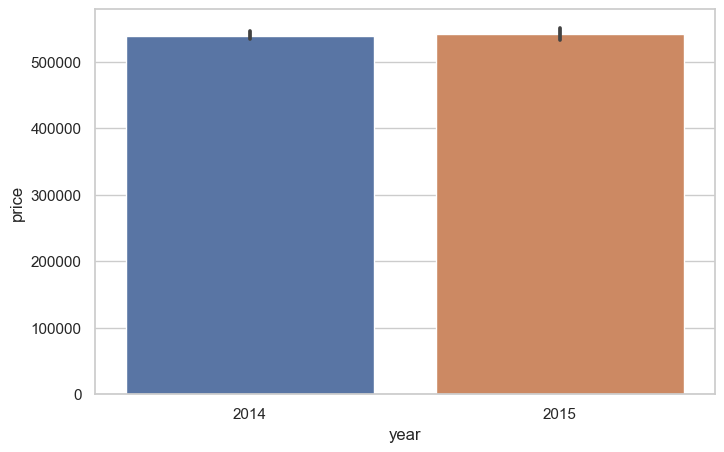

In [134]:
sns.barplot(x=mah['year'], y=mah['price'], data=mah)

Since the plot reveals no significant difference between the two years, exploring the data using months could provide more insightful comparisons.

Text(0.5, 1.0, 'Monthly Housing Prices')

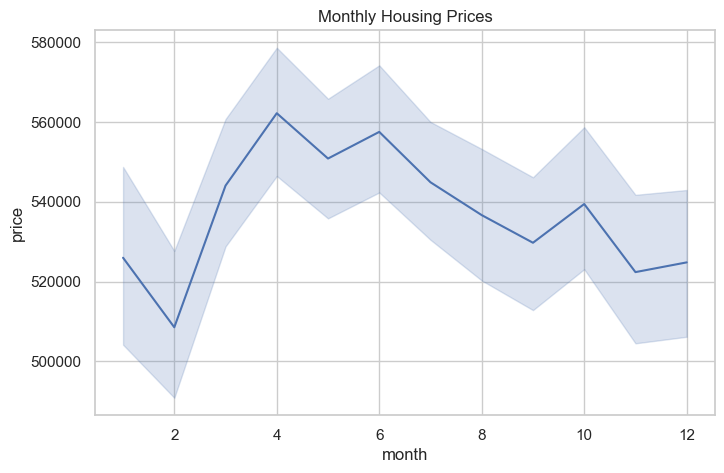

In [135]:
sns.lineplot(x=mah['month'], y=mah['price'], data=mah)
plt.title('Monthly Housing Prices')

<Figure size 1200x600 with 0 Axes>

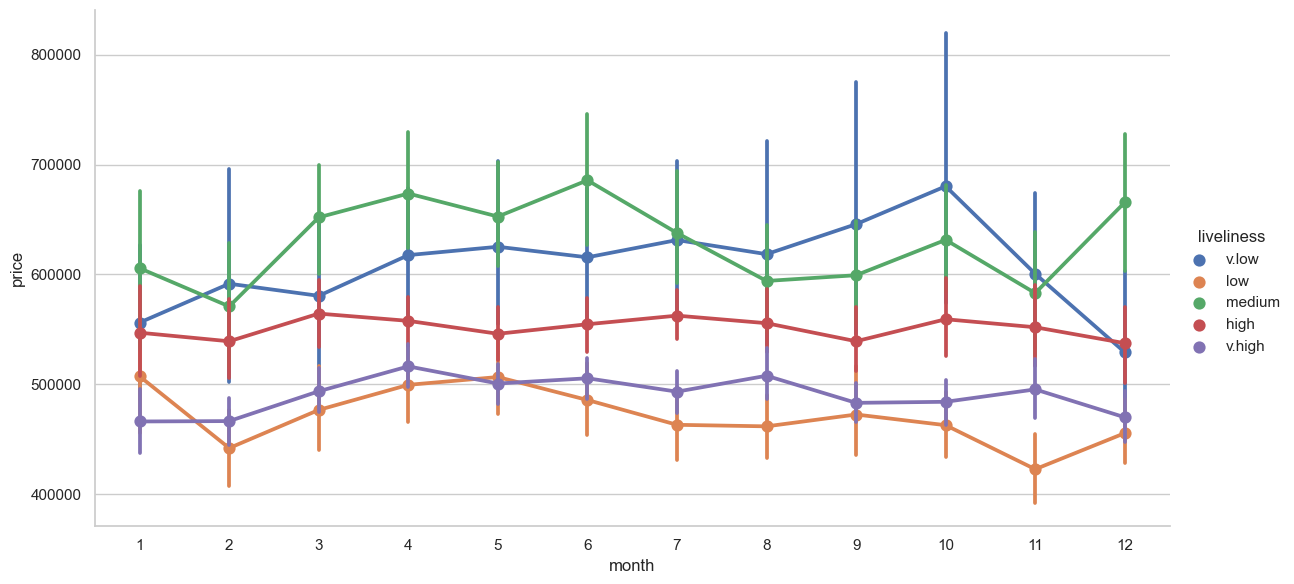

In [136]:
plt.figure(figsize=(12, 6))
sns.catplot(x='month', y='price', hue='liveliness', data=mah, kind='point', height=6, aspect=2)


Text(0.5, 1.0, 'Monthly Housing Prices in Areas with High and Very High Liveliness Zip Codes')

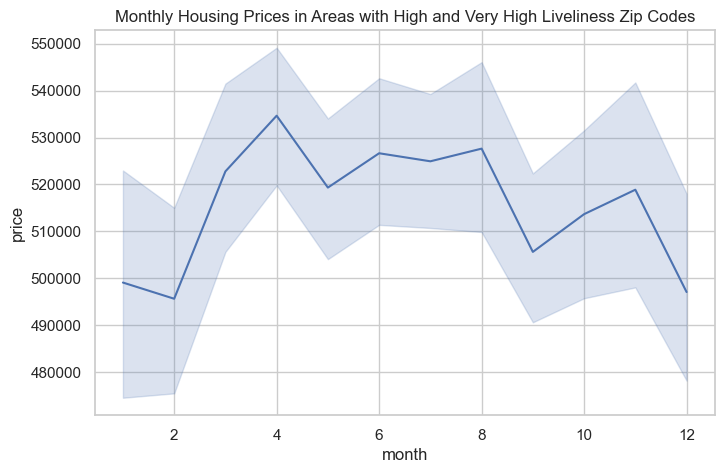

In [137]:
# Creating a new DataFrame that matches the client's requirements.
jad = mah[(mah['liveliness'] == "high") | (mah['liveliness'] == "v.high")]
sns.lineplot(x=jad['month'], y=jad['price'], data=jad)
plt.title('Monthly Housing Prices in Areas with High and Very High Liveliness Zip Codes')

The charts validate our hypothesis, showcasing seasonal variations in housing prices. Based on this analysis, it's recommended to consider purchasing during February, January, December, and September. These months consistently offer lower prices, presenting ideal opportunities for buyers.

`2 - House prices tend to rise in areas with a higher level of liveliness`


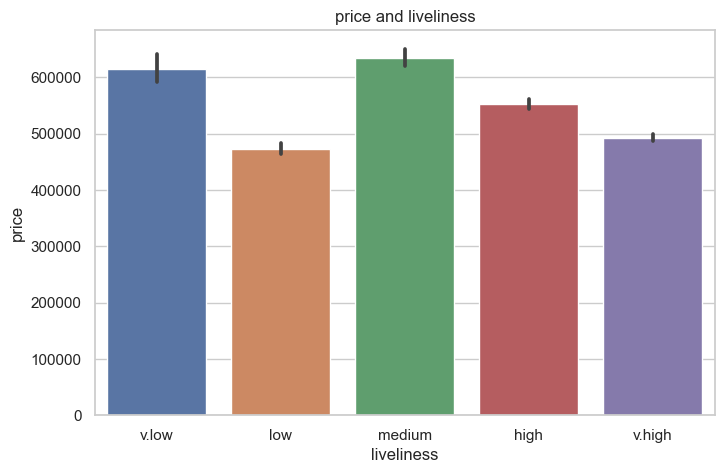

In [113]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.barplot(x=mah['liveliness'], y=mah['price'], data=mah)
plt.title('price and liveliness')
plt.xlabel('liveliness')
plt.ylabel('price')
#plt.xticks(rotation=90) 
plt.show()

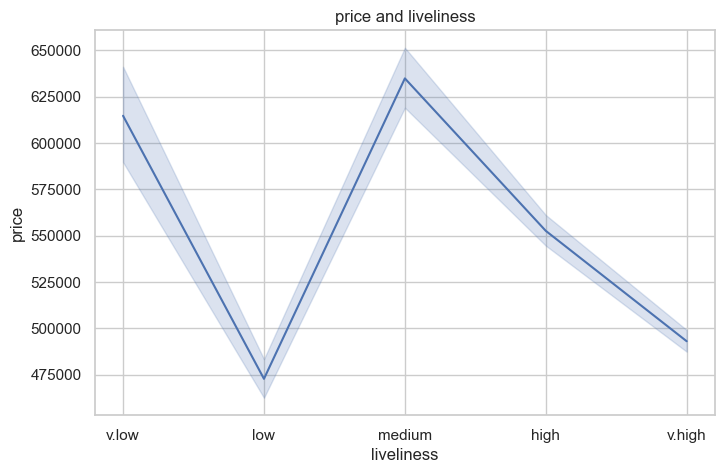

In [114]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.lineplot(x=mah['liveliness'], y=mah['price'], data=mah)
plt.title('price and liveliness')
plt.xlabel('liveliness')
plt.ylabel('price')
#plt.xticks(rotation=90) 
plt.show()

This hypothesis is disproven by the charts, revealing that areas rated as medium and very low liveliness exhibit higher prices, while those with a very high level of liveliness have the lowest prices. Interestingly, this observation aligns with the preferences of affluent individuals, who often favor quieter, more exclusive neighborhoods. Despite their high liveliness rating, these areas may offer fewer housing options or cater to a different demographic, resulting in lower property prices. This phenomenon highlights the complexity of housing markets and the diverse factors influencing pricing dynamics.

`3 - The higher the grade the higher the price`

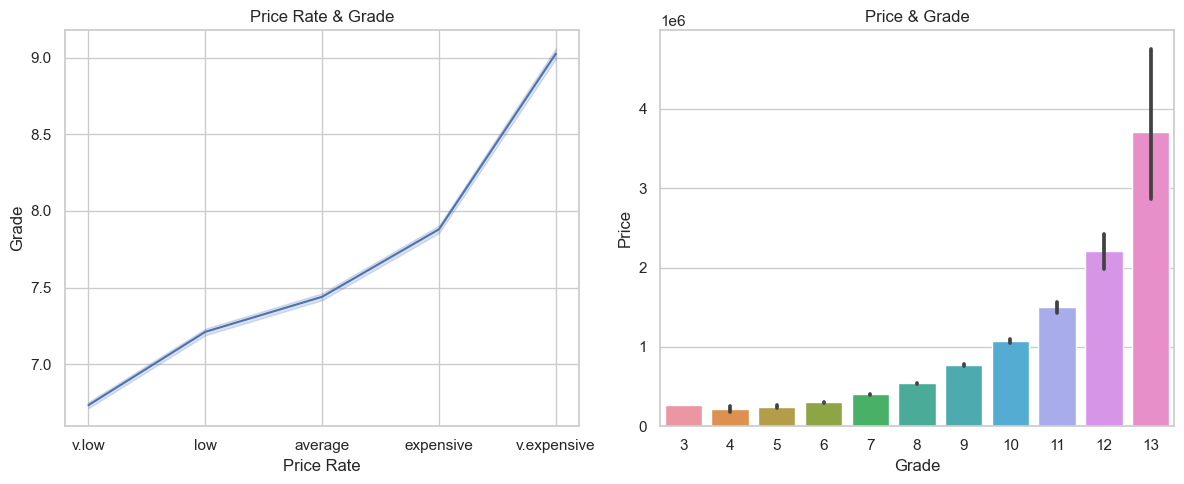

In [117]:
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the lineplot in the first subplot
sns.lineplot(x='price_level', y='grade', data=mah, ax=axes[0])
axes[0].set_title('Price Rate & Grade')
axes[0].set_xlabel('Price Rate')
axes[0].set_ylabel('Grade')

# Plot the barplot in the second subplot
sns.barplot(x='grade', y='price', data=mah, ax=axes[1])
axes[1].set_title('Price & Grade')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


The charts clearly illustrate that higher grades correspond to higher prices, confirming the hypothesis."

# Recommendations:

Utilizing the DataFrame 'Jad' will simplify the process of shortlisting houses that meet the client's requirements.

In [145]:
jad.head(5)

,id,date,price,bedrooms,grade,zipcode,lat,long,liveliness,year,month,price_level
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,high,2014,12,expensive
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,high,2015,2,average
5,7237550310,2014-05-12,1230000.000,4,11,98053,47.656,-122.005,high,2014,5,v.expensive
9,3793500160,2015-03-12,323000.000,3,7,98038,47.368,-122.031,v.high,2015,3,low
11,9212900260,2014-05-27,468000.000,2,7,98115,47.690,-122.292,v.high,2014,5,average


In [141]:
#filtering the data frame for only those two price levels 
desired_price_levels = ['low', 'average']
filtered_jad = jad[jad['price_level'].isin(desired_price_levels)]
filtered_jad[['id', 'zipcode', 'lat', 'long']]


,id,zipcode,lat,long
4,1954400510,98074,47.617,-122.045
9,3793500160,98038,47.368,-122.031
11,9212900260,98115,47.690,-122.292
13,6054650070,98074,47.613,-122.045
17,6865200140,98103,47.665,-122.343
...,...,...,...,...
21591,2997800021,98116,47.577,-122.409
21592,263000018,98103,47.699,-122.346
21594,1523300141,98144,47.594,-122.299
21595,291310100,98027,47.535,-122.069


Applying this additional filter, along with the recommended months for purchasing a house, will provide the client with a robust selection of options. This refined list will offer detailed information about desired features such as the number of bedrooms, bathrooms, square footage, and more, streamlining the decision-making process.